#  `Raster Basics`
Date: 10.05.2024    
Lecturers: Harald Kristen &
Matthias Wecht

# Agenda

* Satellite Data Download

* Metadata

* Manipulation

* Visualization

* Spectral Enhancement

## Setup python-packages in your notebook



[geopandas](https://geopandas.org/en/stable/getting_started/introduction.html)

[rasterio](https://rasterio.readthedocs.io/en/latest/)

[rasterstats](https://pythonhosted.org/rasterstats/)

[rasterio plotting](https://rasterio.readthedocs.io/en/latest/topics/plotting.html)

[matplotlib](https://matplotlib.org/)

[satellite-download](https://browser.dataspace.copernicus.eu/)

[geojson](https://geojson.io)


## Satellite Data Download

[satellite-download](https://browser.dataspace.copernicus.eu/)

## Import the required python-packages

In [2]:
import numpy
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show_hist
from rasterio.enums import ColorInterp
from pathlib import Path
from rasterstats import zonal_stats



## Download the input data
As raster files are usually quite big, these can't be incorporated in this Github repo. Please download the files packaged as ZIP file from [this link](https://drive.google.com/file/d/13FcK5LcwBk-ZA1CNuJ-augyQcULOqhZx/view?usp=sharing)



## Metadata


In [3]:

# Open the raster dataset
with rasterio.open('T33TWN_20240511T095031_B02_10m.jp2') as dataset:

    # Print the  the raster dataset
    print('\nDataset: ', dataset)

    # Print the number of bands in the raster dataset
    print('\nNumber of bands: ', dataset.count)

    # Print the shape (rows, columns) of the raster dataset
    print('\ndataset shape: ', dataset.shape)

    # Print the data types of the raster dataset
    print('\ndataset data types: ', dataset.dtypes)

    # Print the bounding box (xmin, ymin, xmax, ymax) of the raster dataset
    print('\ndataset bounds: ', dataset.bounds)

    # Print the coordinate reference system (CRS) of the raster dataset
    print('\ndataset coordinate reference system: ', dataset.crs)

    # Print the affine transformation matrix of the raster dataset
    print('\ndataset transformation matrix: ', dataset.transform)

    # Print the nodata values of the raster dataset
    print('\ndataset nodata values: ', dataset.nodatavals)

    # Print the band indices of the raster dataset
    print('\ndataset band indices', dataset.indexes)

    # Check if the raster dataset is closed (should be False inside the 'with' block)
    print('\n', dataset.closed)

    # Print the profile (comprehensive metadata) of the raster dataset
    print('\ndataset profile: \n', dataset.profile)

    # Print the metadata (basic information) of the raster dataset
    print('\ndataset metadata: \n', dataset.meta)

# Check if the raster dataset is closed (should be True outside the 'with' block)
print(dataset.closed)
print('\ndataset profile: \n', dataset.profile)



Dataset:  <open DatasetReader name='T33TWN_20240511T095031_B02_10m.jp2' mode='r'>

Number of bands:  1

dataset shape:  (10980, 10980)

dataset data types:  ('uint16',)

dataset bounds:  BoundingBox(left=499980.0, bottom=5190240.0, right=609780.0, top=5300040.0)

dataset coordinate reference system:  EPSG:32633

dataset transformation matrix:  | 10.00, 0.00, 499980.00|
| 0.00,-10.00, 5300040.00|
| 0.00, 0.00, 1.00|

dataset nodata values:  (None,)

dataset band indices (1,)

 False

dataset profile: 
 {'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 5300040.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}

dataset metadata: 
 {'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 5300040.0)}
Tr

In [4]:
def rasterinfo(path):
    with rasterio.open(path) as dataset:
        print('\nDataset: ', dataset)
        print('\nNumber of bands: ', dataset.count)
        print('\ndataset shape: ', dataset.shape)
        print('\ndataset data types: ', dataset.dtypes)
        print('\ndataset bounds: ', dataset.bounds)
        print('\ndataset coordinate reference system: ', dataset.crs)
        print('\ndataset transformation matrix: ', dataset.transform)
        print('\ndataset nodata values: ', dataset.nodata)
        print('\ndataset band indices', dataset.indexes)
        print('\ndataset profile: \n', dataset.profile)
        print('\ndataset metadata: \n', dataset.meta)



In [5]:
rasterinfo('T33TWN_20240511T095031_B02_10m.jp2')


Dataset:  <open DatasetReader name='T33TWN_20240511T095031_B02_10m.jp2' mode='r'>

Number of bands:  1

dataset shape:  (10980, 10980)

dataset data types:  ('uint16',)

dataset bounds:  BoundingBox(left=499980.0, bottom=5190240.0, right=609780.0, top=5300040.0)

dataset coordinate reference system:  EPSG:32633

dataset transformation matrix:  | 10.00, 0.00, 499980.00|
| 0.00,-10.00, 5300040.00|
| 0.00, 0.00, 1.00|

dataset nodata values:  None

dataset band indices (1,)

dataset profile: 
 {'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 5300040.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}

dataset metadata: 
 {'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 5300040.0)}


### Transformation matrices

the .transform attribute of a raster dataset provides the affine transformation matrix for converting between pixel coordinates and geographic coordinates.

In [6]:
dataset = rasterio.open('T33TWN_20240511T095031_B02_10m.jp2')
print(dataset.transform) ## Affine Transformation Matrix (Geometric Resolution)
dataset.close()

| 10.00, 0.00, 499980.00|
| 0.00,-10.00, 5300040.00|
| 0.00, 0.00, 1.00|


$\begin{bmatrix} scale \ shear \ translation \\ shear \ scale \ translation \\ 0 \ 0 \ 1 \end{bmatrix}$

0 0 1 = constant for 2D translation


![pixel-coordinates.png](attachment:pixel-coordinates.png)

(https://math.hws.edu/graphicsbook/c2/pixel-coordinates.png)

In [7]:
x,y = dataset.transform * (50,50)
print(x,y)

500480.0 5299540.0


In [8]:
# linear equation
xi = 50*10 + 50*0 + dataset.transform[2]
yi = 50*-10 + 50*0 + dataset.transform[5]
print(xi,yi)

500480.0 5299540.0


In [9]:
# inverse to get pixel coordinates from world coordinates
~dataset.transform * (x,y)

(50.0, 50.0)

## Manipulation

### Layer Stack

In [10]:
file_list = ['T33TWN_20240511T095031_B04_10m.jp2', 'T33TWN_20240511T095031_B03_10m.jp2', 'T33TWN_20240511T095031_B02_10m.jp2','T33TWN_20240511T095031_B08_10m.jp2']

# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta
    meta.update(count = len(file_list))
    with rasterio.open('S2A_20240511T095031_rgbn_32633.tif', 'w', **meta) as dst:
        for id, layer in enumerate(file_list, start=1):
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1))

### Clip

In [11]:
gdf_research_area = gpd.read_file('research_area.geojson')
bound_crs = gdf_research_area.to_crs({'init': 'epsg:32633'})
with rasterio.open('S2A_20240511T095031_rgbn_32633.tif') as src:
  out_image, out_transform = mask(src,
  bound_crs.geometry,crop=True)
  out_meta = src.meta.copy()
  out_meta.update({"driver": "GTiff",
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform})
with rasterio.open("S2A_20240511T095031_rgbn_32633_ra.tif", "w", **out_meta) as dst:
  dst.write(out_image)

c:\Users\Harald\miniconda3\envs\egm_2024\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### Rescale

In [12]:
scale = 1/2
with rasterio.open('S2A_20240511T095031_rgbn_32633_ra.tif') as src0:
    data = src0.read(out_shape=(src0.count,int(src0.height * scale),int(src0.width * scale)),resampling=Resampling.nearest)
    print('Shape before resample:', src0.shape)
    print('Shape after resample:', data.shape[1:])
    transform = src0.transform * src0.transform.scale((src0.width / data.shape[-1]),(src0.height / data.shape[-2]))
    print('Transform before resample:\n', src0.transform, '\n')
    print('Transform after resample:\n', transform)
    meta = src0.meta.copy()
    meta.update({"transform": transform,"width": data.shape[-1],"height": data.shape[-2],"nodata": 0,})

with rasterio.open("S2A_20240511T095031_rgbn_32633_ra_20m.tif", "w", **meta) as dst:
  for i in range(data.shape[0]):
    dst.write(data[i], i+1)

Shape before resample: (933, 1084)
Shape after resample: (466, 542)
Transform before resample:
 | 10.00, 0.00, 529070.00|
| 0.00,-10.00, 5216690.00|
| 0.00, 0.00, 1.00| 

Transform after resample:
 | 20.00, 0.00, 529070.00|
| 0.00,-20.02, 5216690.00|
| 0.00, 0.00, 1.00|


### Reproject

In [13]:

# Define the source and destination CRS
src_crs = 'EPSG:32633'  # Source CRS
dst_crs = 'EPSG:4326'  # Destination CRS (same as source in this case)

# Open the source raster file
with rasterio.open('S2A_20240511T095031_rgbn_32633_ra.tif') as src:
    # Calculate the transform and output shape for the reprojected image
    transform, width, height = calculate_default_transform(src_crs, dst_crs, src.width, src.height, *src.bounds)

    # Update the profile to match the new CRS
    dst_profile = src.profile.copy()
    dst_profile.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    print(src.profile)
    print(dst_profile)

    # Create the output raster file
    with rasterio.open('S2A_20240511T095031_rgbn_4326_ra.tif', 'w', **dst_profile) as dst:
        # Perform the reprojection
        for i in range(1,src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest  # You can choose a resampling method
            )


{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1084, 'height': 933, 'count': 4, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 529070.0,
       0.0, -10.0, 5216690.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1241, 'height': 731, 'count': 4, 'crs': 'EPSG:4326', 'transform': Affine(0.00011555871029863693, 0.0, 15.382508005497115,
       0.0, -0.00011555871029863693, 47.103077128887854), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


### Profile Update

In [14]:
# Open the raster dataset 'S2A_MSIL2A_20210706T095031_ost.tif' using rasterio
with rasterio.open('S2A_20240511T095031_rgbn_32633_ra.tif','r+') as dataset:
    dataset.nodata = None
    profile = dataset.profile
    print(profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1084, 'height': 933, 'count': 4, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 529070.0,
       0.0, -10.0, 5216690.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


### Spectral Enhancement (`Dangerous` --> multiple equation of line)

In [15]:
with rasterio.open('S2A_20240511T095031_rgbn_32633_ra.tif') as src:
    dst_profile = src.profile.copy()
    dst_profile.update({
        'dtype': numpy.uint8})

    with rasterio.open('S2A_20240511T095031_rgbn_32633_ra_enh.tif', 'w', **dst_profile) as dst:
        for i in range(1,src.count + 1):
            xmax = round(numpy.percentile(src.read(i),99.9))
            xmin = round(numpy.percentile(src.read(i),1.4))
            print(xmin,xmax)
            xmax = 10000
            xmin = 1000
            dtype_max = numpy.iinfo(numpy.uint8).max
            band_enh = (src.read(i) - xmin) * (dtype_max / (xmax - xmin))
            band_enh = band_enh.astype(numpy.uint8)
            dst.write(band_enh,i)


1155 5339
1316 5242
1143 5085
1323 7408


![Percentile](attachment:MTc0NjQ2Mjc1Mjg5OTE2Nzk0.webp)

point slope form:

$y−y1​=m⋅(x−x1​)$

slope:

$m=\frac{x2​−x1}{​y2​−y1}$


In [16]:
rasterinfo('S2A_20240511T095031_rgbn_32633_ra_enh.tif')


Dataset:  <open DatasetReader name='S2A_20240511T095031_rgbn_32633_ra_enh.tif' mode='r'>

Number of bands:  4

dataset shape:  (933, 1084)

dataset data types:  ('uint8', 'uint8', 'uint8', 'uint8')

dataset bounds:  BoundingBox(left=529070.0, bottom=5207360.0, right=539910.0, top=5216690.0)

dataset coordinate reference system:  EPSG:32633

dataset transformation matrix:  | 10.00, 0.00, 529070.00|
| 0.00,-10.00, 5216690.00|
| 0.00, 0.00, 1.00|

dataset nodata values:  None

dataset band indices (1, 2, 3, 4)

dataset profile: 
 {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1084, 'height': 933, 'count': 4, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 529070.0,
       0.0, -10.0, 5216690.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

dataset metadata: 
 {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1084, 'height': 933, 'count': 4, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 529070.0,
       0.0, -10.0, 5216690

### NDVI calculation

In [17]:
# Open the source raster file
with rasterio.open('S2A_20240511T095031_rgbn_32633_ra.tif') as src:
    # Calculate the transform and output shape for the reprojected image
    nir = src.read(4).astype(numpy.double)
    red = src.read(3).astype(numpy.double)
    ndvi = (nir-red)/(nir+red)
    # Update the profile to match the new CRS
    dst_profile = src.profile.copy()
    dst_profile.update({
        'dtype': numpy.double,
        'count': 1
    })
    with rasterio.open('S2A_20240511T095031_ndvi_32633_ra.tif', 'w', **dst_profile) as dst:
        dst.write(ndvi, 1)




C:\Users\Harald\AppData\Local\Temp\ipykernel_19012\2049118791.py:6: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir-red)/(nir+red)


### Binary Mask

In [18]:
# Open the source raster file
with rasterio.open('S2A_20240511T095031_ndvi_32633_ra.tif') as src:
    ndvi = numpy.where(src.read(1) < 0.45, 0, 1)
    with rasterio.open('S2A_20240511T095031_mask_32633_ra.tif', 'w', **dst_profile) as dst:
        dst.write(ndvi, 1)

### Zonal Statistiks

In [19]:
stats = zonal_stats(gdf_train, array, affine=dataset_src.transform, stats=['min', 'max', 'mean', 'median', 'majority'],nodata = 0)

NameError: name 'gdf_train' is not defined

## Visualization

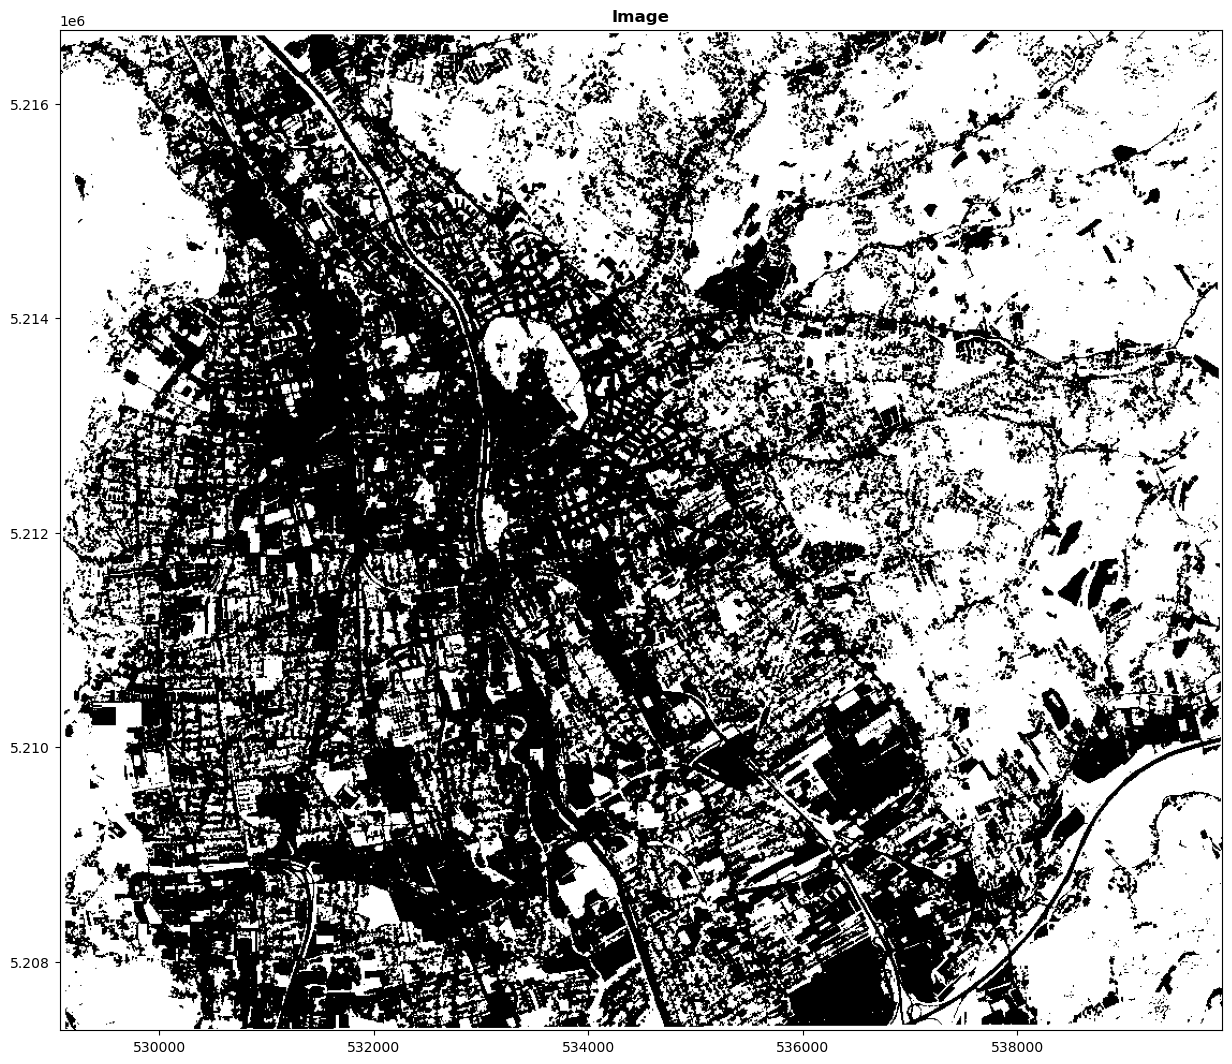

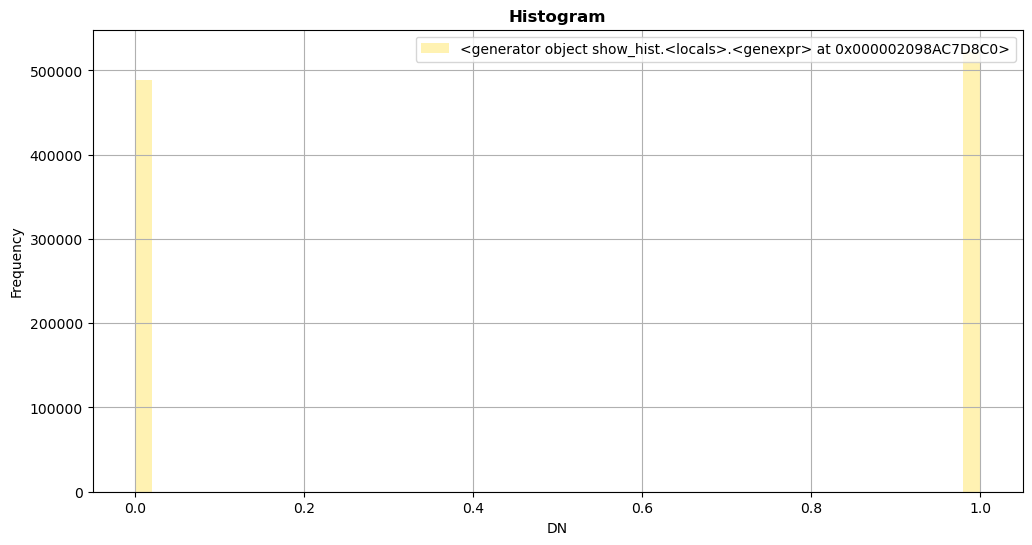

In [ ]:
with rasterio.open('S2A_20240511T095031_mask_32633_ra.tif') as dataset:
    fig, ax = plt.subplots(1, figsize=(15, 15))
    show(dataset.read(1),transform=dataset.transform, title="Image",cmap='grey')

    fig, ax = plt.subplots(1, figsize=(12, 6))
    show_hist(dataset.read(1), bins=50, lw=0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")